# Example Notebook

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

import pybsm.simulation as simulation

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

asset_dir = "/workspaces/fall-2024-class-06/notebooks/data/images"

In [2]:
image_file = asset_dir + "/car_overhead.jpg"
image = plt.imread(image_file)

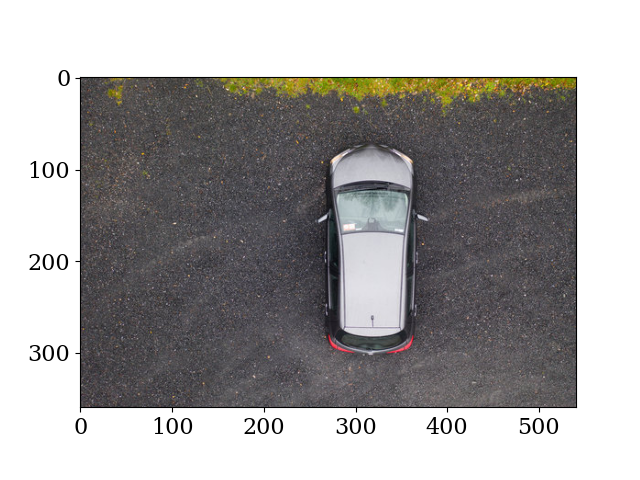

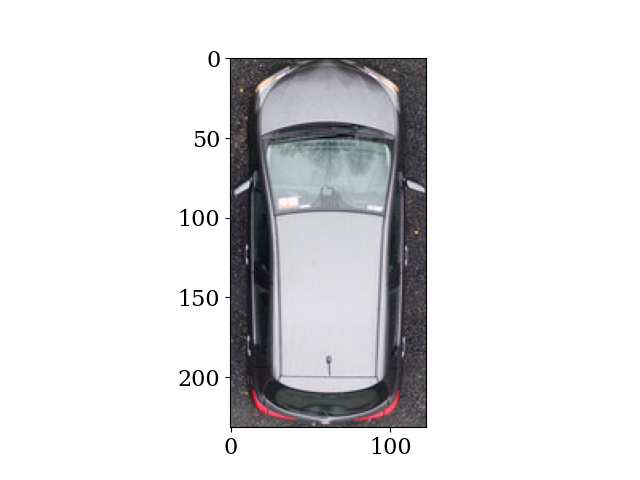

In [3]:
plt.figure()
plt.imshow(image)
plt.show()

start_px_y = 73
end_px_y = 305

start_px_x = 257
end_px_x = 380

image_cropped_to_car = image[start_px_y:end_px_y, start_px_x:end_px_x, :]

plt.figure()
plt.imshow(image_cropped_to_car)
plt.show()

In [4]:
FT_TO_METERS = 0.3048
car_length_ft = 15
car_length_meters = car_length_ft * FT_TO_METERS
car_length_px = end_px_y - start_px_y
gsd_meters_per_px = car_length_meters / car_length_px

In [5]:
reference_image = simulation.RefImage(image, gsd=gsd_meters_per_px)

In [6]:
sensor, scenario = reference_image.estimate_capture_parameters(altitude=1000)

In [7]:
def print_attributes(my_object):
    print(
        "\n".join(
            [
                attribute
                for attribute in dir(my_object)
                if not attribute.startswith("_")
            ]
        )
    )


print_attributes(sensor)

D
L_x
L_y
bit_depth
cold_filter_emissivity
cold_filter_temperature
cold_filter_transmission
cold_shield_temperature
da_x
da_y
dark_current
eta
f
filter_kernel
frame_stacks
int_time
max_n
max_well_fill
n_tdi
name
opt_trans_wavelengths
optics_emissivity
optics_temperature
optics_transmission
other_irradiance
other_noise
p_x
p_y
pv
pv_wavelength
qe
qe_wavelengths
read_noise
s_x
s_y
w_x
w_y


In [10]:
print(sensor.L_x)
print(sensor.L_y)
print(sensor.bit_depth)
print(sensor.dark_current)

0.10960629921614568
0.10960629921614568
100.0
0


In [8]:
print_attributes(scenario)

aircraft_speed
altitude
atm
background_reflectance
background_temperature
cn2_at_1m
ground_range
ha_wind_speed
ihaze
name
target_reflectance
target_temperature


In [11]:
print(scenario.aircraft_speed)
print(scenario.altitude)
print(scenario.cn2_at_1m)
print(scenario.ihaze)

0
1000
0
1


In [13]:
image_out = simulation.simulate_image(reference_image, sensor, scenario)[2]
img_out_8bit = simulation.stretch_contrast_convert_8bit(image_out)

/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:155: RuntimeWarning: divide by zero encountered in divide
  np.arccos(rho / eta / r0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:155: RuntimeWarning: invalid value encountered in divide
  np.arccos(rho / eta / r0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:156: RuntimeWarning: divide by zero encountered in divide
  - (rho / eta / r0) * np.sqrt(1.0 - (rho / eta / r0) ** 2.0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:156: RuntimeWarning: invalid value encountered in divide
  - (rho / eta / r0) * np.sqrt(1.0 - (rho / eta / r0) ** 2.0)
/workspaces/fall-2024-class-06/.venv/lib/python3.12/site-packages/pybsm/otf/functional.py:164: RuntimeWarning: divide by zero encountered in divide
  phi = np.arccos((1.0 + eta**2.0 - (2.0 * rho / r0) ** 2) / 2.0 / eta)
/workspace

ImportError: OpenCV not found. Please install 'pybsm[graphics]' or 'pybsm[headless]'.